# DATOS Y ANÁLISIS DE LOS HÁBITOS ESTUDIANTILES

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from bootcampviztools import pinta_distribucion_categoricas, bubble_plot, grafico_dispersion_con_correlacion, plot_grouped_histograms, plot_grouped_boxplots, plot_combined_graphs, plot_categorical_numerical_relationship, plot_categorical_relationship_fin, card_tipo

from scipy.stats import pearsonr, chi2_contingency, mannwhitneyu, f_oneway



In [151]:
df = pd.read_csv("../data/habitos/student_habits_performance.csv")

In [152]:
# Compruebo que no haya duplicados
df.duplicated().sum() # NO HAY DUPLICADOS

np.int64(0)

In [153]:
df.describe()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,1000.0000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.4980,3.55010,2.505500,1.819700,84.131700,6.470100,3.042000,5.438000,69.601500
std,2.3081,1.46889,1.172422,1.075118,9.399246,1.226377,2.025423,2.847501,16.888564
min,17.0000,0.00000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.7500,2.60000,1.700000,1.000000,78.000000,5.600000,1.000000,3.000000,58.475000
50%,20.0000,3.50000,2.500000,1.800000,84.400000,6.500000,3.000000,5.000000,70.500000
75%,23.0000,4.50000,3.300000,2.525000,91.025000,7.300000,5.000000,8.000000,81.325000
max,24.0000,8.30000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


In [154]:
# Comprobamos que no haya nulos
df.isnull().mean()*100 # HAY NULOS

student_id                       0.0
age                              0.0
gender                           0.0
study_hours_per_day              0.0
social_media_hours               0.0
netflix_hours                    0.0
part_time_job                    0.0
attendance_percentage            0.0
sleep_hours                      0.0
diet_quality                     0.0
exercise_frequency               0.0
parental_education_level         9.1
internet_quality                 0.0
mental_health_rating             0.0
extracurricular_participation    0.0
exam_score                       0.0
dtype: float64

In [155]:
df.internet_quality.value_counts()

internet_quality
Good       447
Average    391
Poor       162
Name: count, dtype: int64

In [156]:
df.internet_quality.value_counts(normalize=True)*100 # Más del 80% de estudiantes tienen buena conexión a internet o por lo menos es decente, así que quitaré esa column. 

internet_quality
Good       44.7
Average    39.1
Poor       16.2
Name: proportion, dtype: float64

In [157]:
# Veo que los nulos están en la columna de 'parental_education_level', pero esa columna y otras no la usaré en este dataset
df.drop(["part_time_job", "internet_quality", "extracurricular_participation"], axis = 1, inplace= True)

In [158]:
card_tipo(df) # MIRO LA CARDINALIDAD PARA EL ID Y LOS TIPOS DE DATOS

,Card,%_Card,Tipo,tipo_sugerido
student_id,1000,100.0,object,Numerica continua
age,8,0.8,int64,Numerica discreta
gender,3,0.3,object,Categorica
study_hours_per_day,78,7.8,float64,Numerica discreta
social_media_hours,60,6.0,float64,Numerica discreta
netflix_hours,51,5.1,float64,Numerica discreta
attendance_percentage,320,32.0,float64,Numerica continua
sleep_hours,68,6.8,float64,Numerica discreta
diet_quality,3,0.3,object,Categorica
exercise_frequency,7,0.7,int64,Numerica discreta


In [159]:
# Pongo el índice a student_id
df.set_index("student_id", inplace=True)

In [160]:
# Truncar datos
df["study_hours_per_day"] = df.study_hours_per_day.astype(int)
df["sleep_hours"] = df.sleep_hours.astype(int)

In [161]:
# También veo que hay horas de redes sociales y de netflix, voy a agruparlos en una colmna y a dropearlas.
df["ocio_al_dia"] = df.netflix_hours + df.social_media_hours
df.drop(["netflix_hours", "social_media_hours"], axis=1, inplace=True)

In [162]:
# Muestro las 5 primeras
df.head(5)

,age,gender,study_hours_per_day,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,mental_health_rating,exam_score,ocio_al_dia
student_id,,,,,,,,,,,
S1000,23,Female,0,85.0,8,Fair,6,Master,8,56.2,2.3
S1001,20,Female,6,97.3,4,Good,6,High School,8,100.0,5.1
S1002,21,Male,1,94.8,8,Poor,1,High School,1,34.3,4.4
S1003,23,Female,1,71.0,9,Poor,4,Master,1,26.8,4.9
S1004,19,Female,5,90.9,4,Fair,3,Master,1,66.4,4.9


In [163]:
# Ordeno para que salga nota como último
nota = df.pop('exam_score')
df["nota"] = nota

In [164]:
df_numeric = df.drop(["gender", "diet_quality", "parental_education_level"], axis=1)

In [165]:
df

,age,gender,study_hours_per_day,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,mental_health_rating,ocio_al_dia,nota
student_id,,,,,,,,,,,
S1000,23,Female,0,85.0,8,Fair,6,Master,8,2.3,56.2
S1001,20,Female,6,97.3,4,Good,6,High School,8,5.1,100.0
S1002,21,Male,1,94.8,8,Poor,1,High School,1,4.4,34.3
S1003,23,Female,1,71.0,9,Poor,4,Master,1,4.9,26.8
S1004,19,Female,5,90.9,4,Fair,3,Master,1,4.9,66.4
...,...,...,...,...,...,...,...,...,...,...,...
S1995,21,Female,2,77.0,7,Fair,2,High School,6,2.1,76.1
S1996,17,Female,2,86.0,6,Poor,1,High School,6,3.4,65.9
S1997,20,Male,3,61.9,6,Good,5,Bachelor,9,3.9,64.4


In [166]:
df_numeric

,age,study_hours_per_day,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,ocio_al_dia,nota
student_id,,,,,,,,
S1000,23,0,85.0,8,6,8,2.3,56.2
S1001,20,6,97.3,4,6,8,5.1,100.0
S1002,21,1,94.8,8,1,1,4.4,34.3
S1003,23,1,71.0,9,4,1,4.9,26.8
S1004,19,5,90.9,4,3,1,4.9,66.4
...,...,...,...,...,...,...,...,...
S1995,21,2,77.0,7,2,6,2.1,76.1
S1996,17,2,86.0,6,1,6,3.4,65.9
S1997,20,3,61.9,6,5,9,3.9,64.4


# Comparación Numérica

In [167]:
columns = []
for i in df_numeric.drop("nota", axis=1):
    columns.append(i)

len(columns)

7

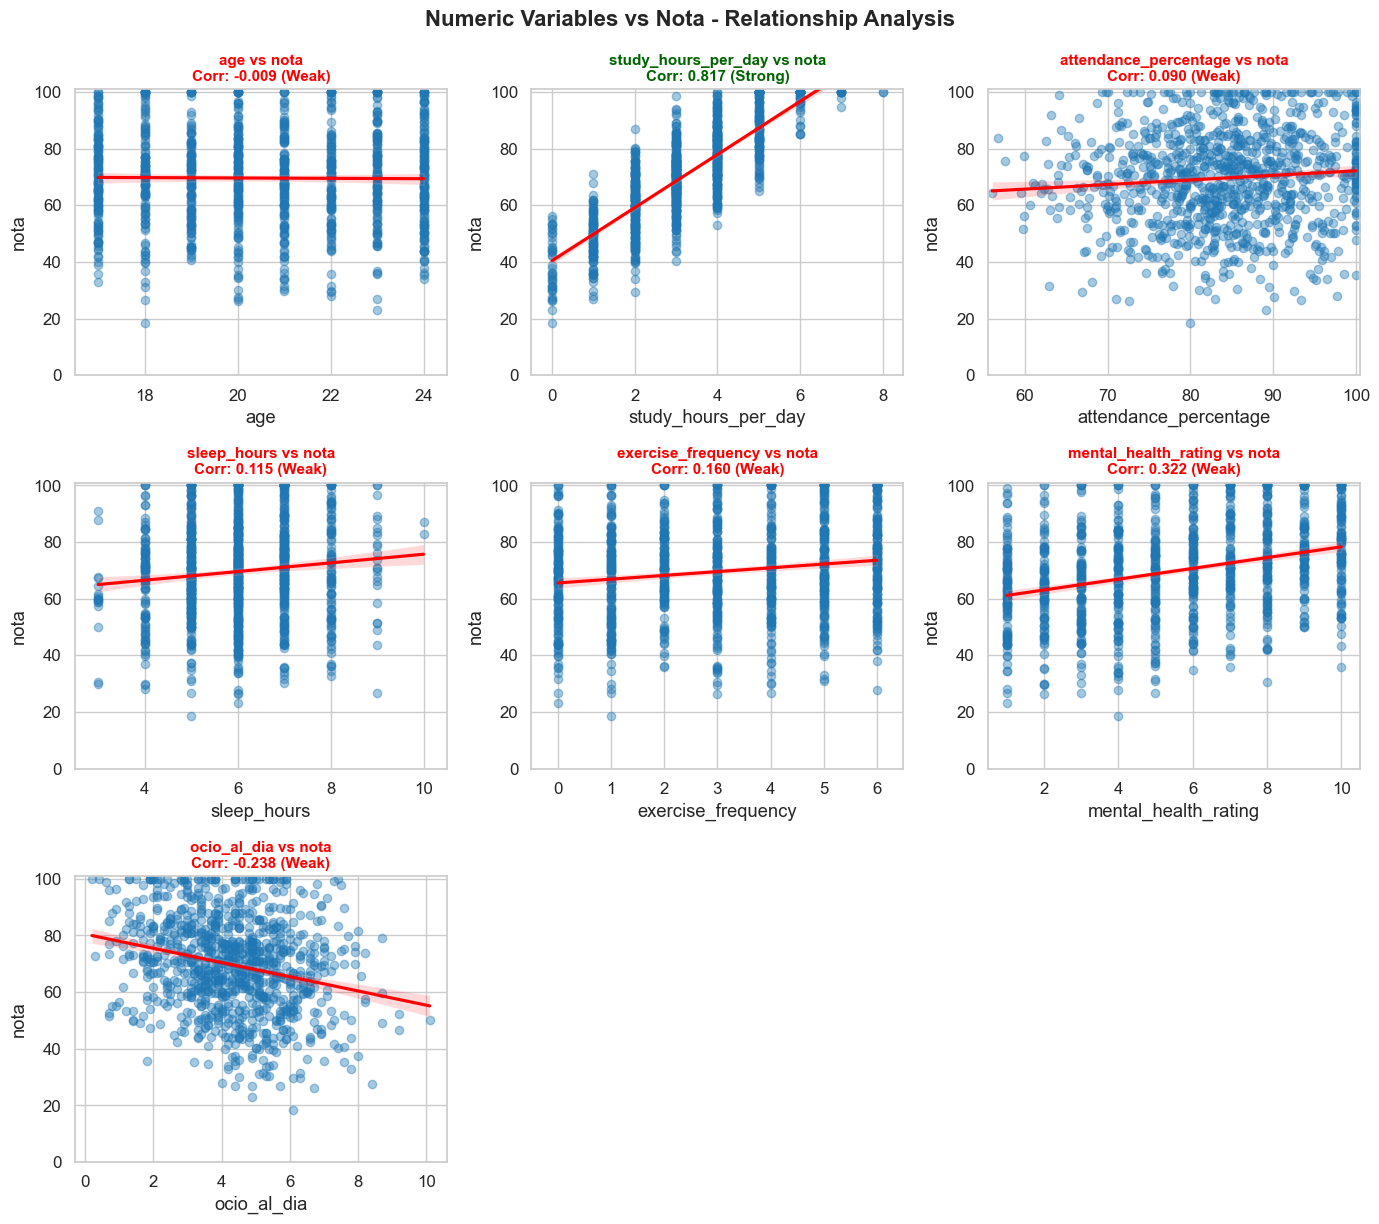

In [168]:
# Estructura de la gráfica
sns.set(style="whitegrid", font_scale=1.1)
fig, axes = plt.subplots(3, 3, figsize=(14, 12))
axes = axes.flatten()

# Hacer cada gráfico
for i, var in enumerate(columns):
    corr = df[var].corr(df['nota'])
    sns.regplot(
        data=df,
        x=var, y='nota',
        ax=axes[i],
        scatter_kws={'alpha': 0.4, 'color': 'tab:blue'},
        line_kws={'color': 'red'}
    )
    axes[i].set_ylim(0, 101)
    axes[i].set_xlim((df_numeric[var].min()-0.5), (df_numeric[var].max()+0.5))
    if abs(corr) > 0.7:
        color = 'darkgreen'
        strength = 'Strong'
    elif abs(corr) > 0.4:
        color = 'orange'
        strength = 'Moderate'
    else:
        color = 'red'
        strength = 'Weak'
    axes[i].set_title(f"{var} vs nota\nCorr: {corr:.3f} {'(Strong)' if abs(corr)>0.5 else '(Weak)'}", fontsize=11, fontweight = 'bold', color = color)

            
# Ajusto y muestro
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle("Numeric Variables vs Nota - Relationship Analysis", fontsize=16, y=1.02, fontweight = 'bold')
plt.show()

# CORRELACIÓN NUMÉRICA

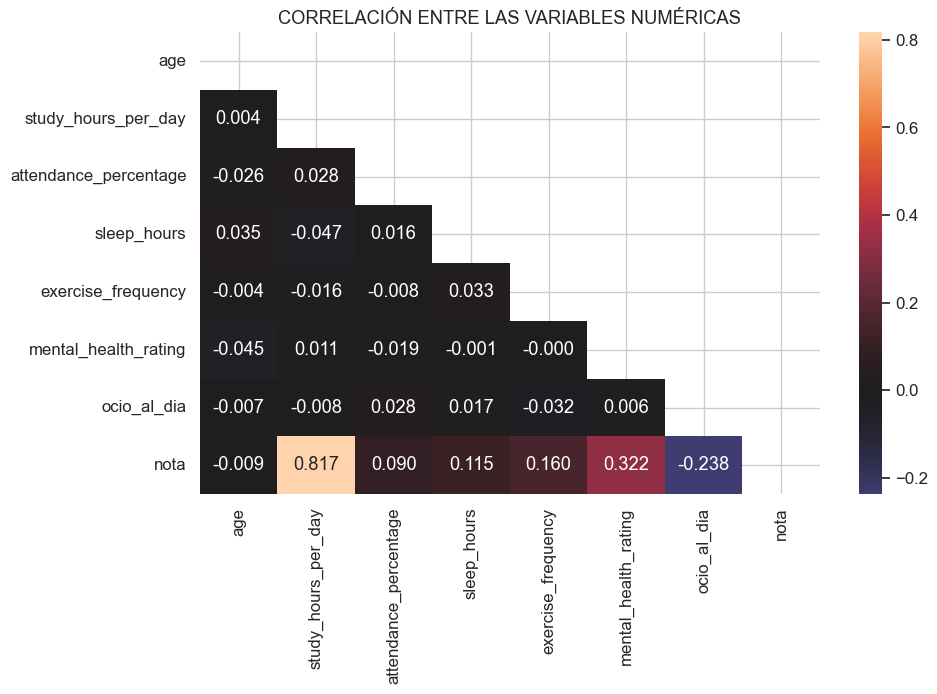

In [169]:
plt.figure(figsize=(10, 6)) 

corr = df_numeric.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr, mask=mask ,annot=True, center=0, fmt='.3f')

#plt.xticks(rotation = 80)
plt.title("CORRELACIÓN ENTRE LAS VARIABLES NUMÉRICAS")
plt.show()

In [170]:
ranking_corr = corr.sort_values(by = "nota", ascending=False)
ranking_corr.drop("nota", axis=0, inplace=True)

top_3 = ranking_corr.nota.head(3).index
top_3_d = reversed(ranking_corr.nota.tail(3).index)

print("🔍 Correlation Insights:")

print(f"\n📈 Top 3 Strongest Positive Correlations with nota:")
for i in top_3:
    print(f"• {i}: {ranking_corr['nota'].loc[i]:.3f}")

print(f"\n📉 Top 3 Strongest Negative Correlations with nota:")
for i in top_3_d:
    print(f"• {i}: {ranking_corr['nota'].loc[i]:.3f}")


🔍 Correlation Insights:

📈 Top 3 Strongest Positive Correlations with nota:
• study_hours_per_day: 0.817
• mental_health_rating: 0.322
• exercise_frequency: 0.160

📉 Top 3 Strongest Negative Correlations with nota:
• ocio_al_dia: -0.238
• age: -0.009
• attendance_percentage: 0.090


# ME CENTRARÉ EN LAS 3 MÁS IMPORTANTES

(4, 2)


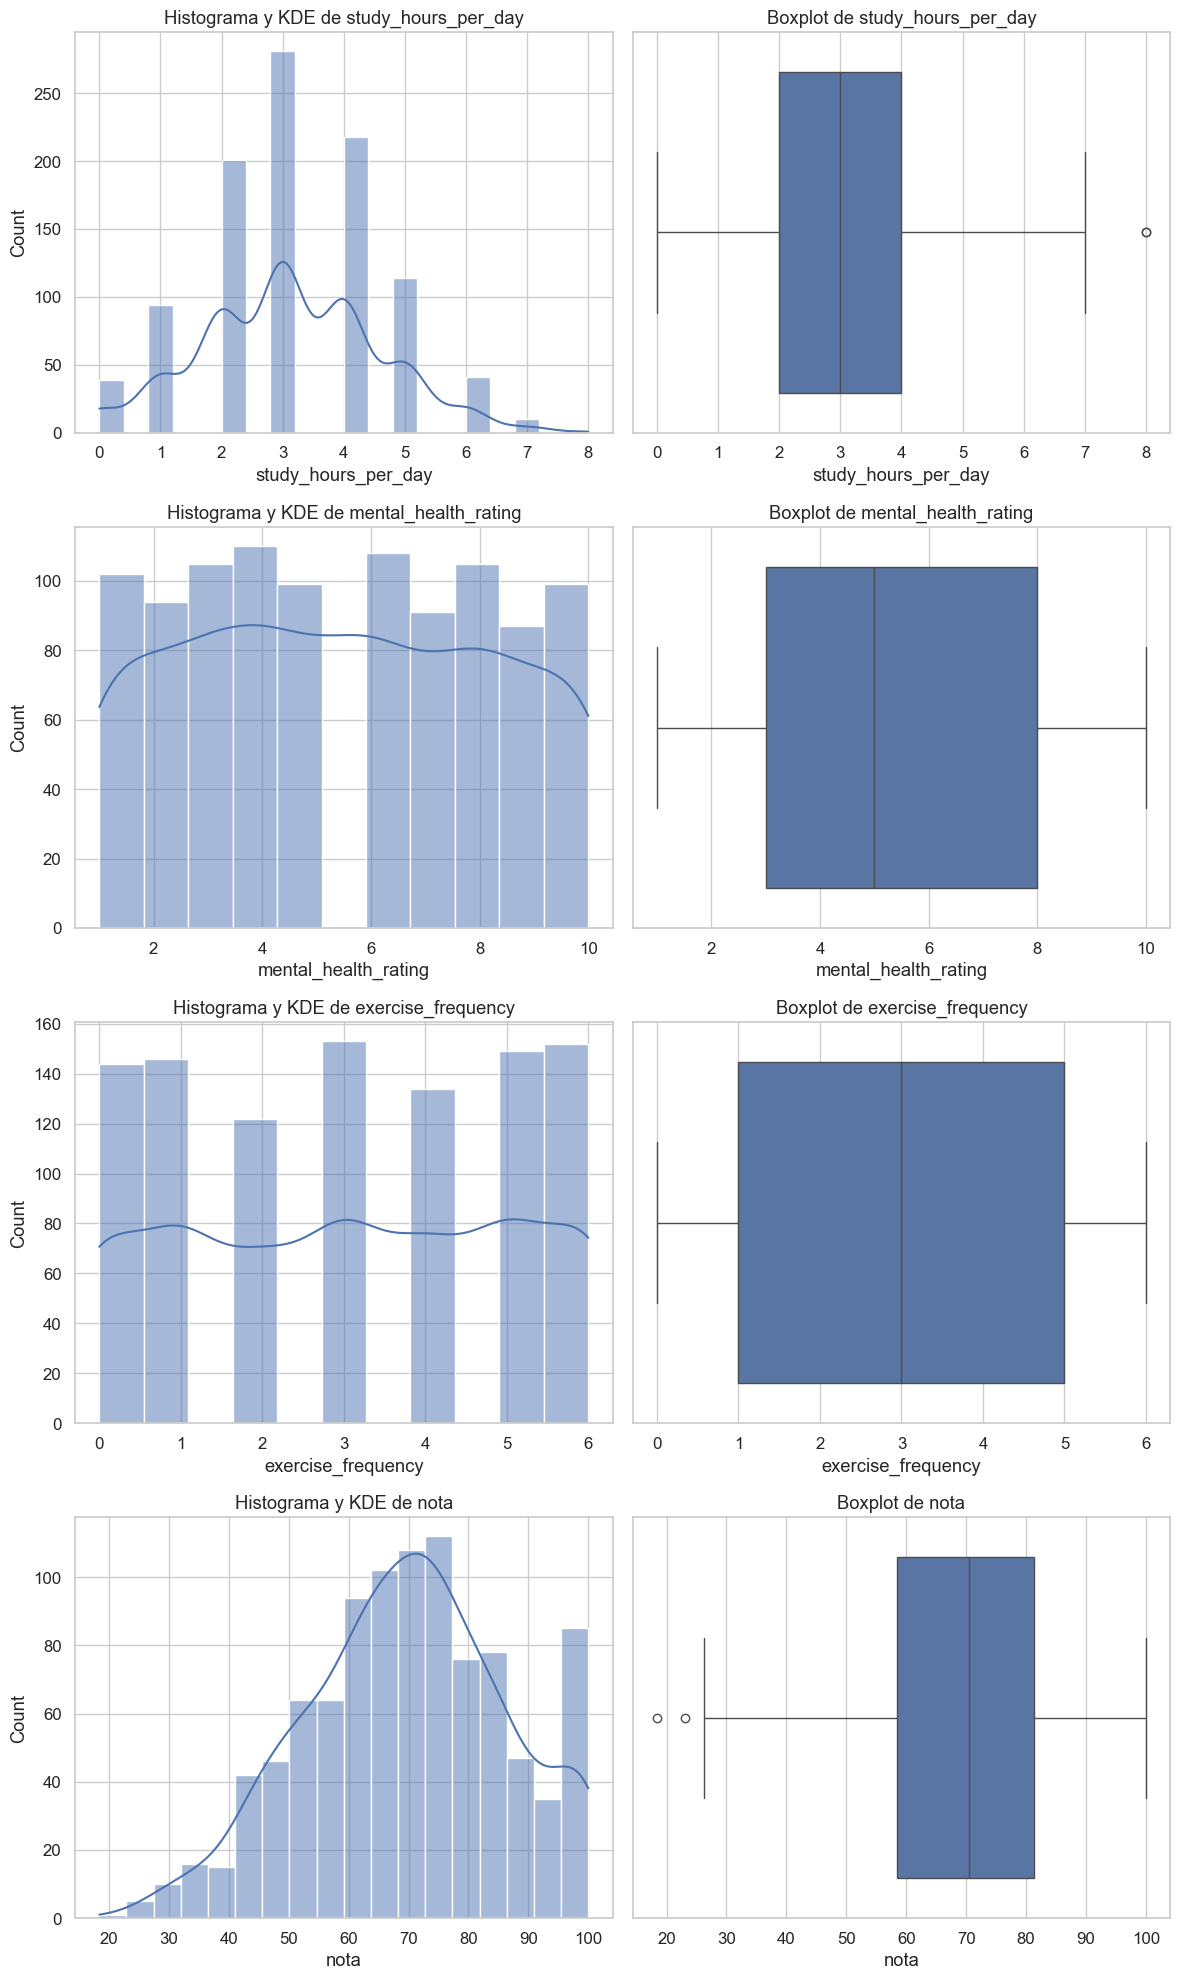

In [171]:
plot_combined_graphs(df, columns=["study_hours_per_day", "mental_health_rating", "exercise_frequency", "nota"])

In [ ]:
rangos = [0, 50, 70, 90, 100]
etiquetas = ["Suspenso", "Bien", "Notable", "Sobresaliente"]
df['Rango_notas'] = pd.cut(df['nota'], bins=rangos, labels=etiquetas, include_lowest=True)

In [ ]:
rangos = [0, 3, 6, 9]
etiquetas = ["0-2", "3-5", "6-9"]
df['Horas_de_estudio_al_día'] = pd.cut(df['study_hours_per_day'], bins=rangos, labels=etiquetas, include_lowest=True)

/Users/lilchoco/DS/EDA-AYMC/memoria/bootcampviztools.py:47: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


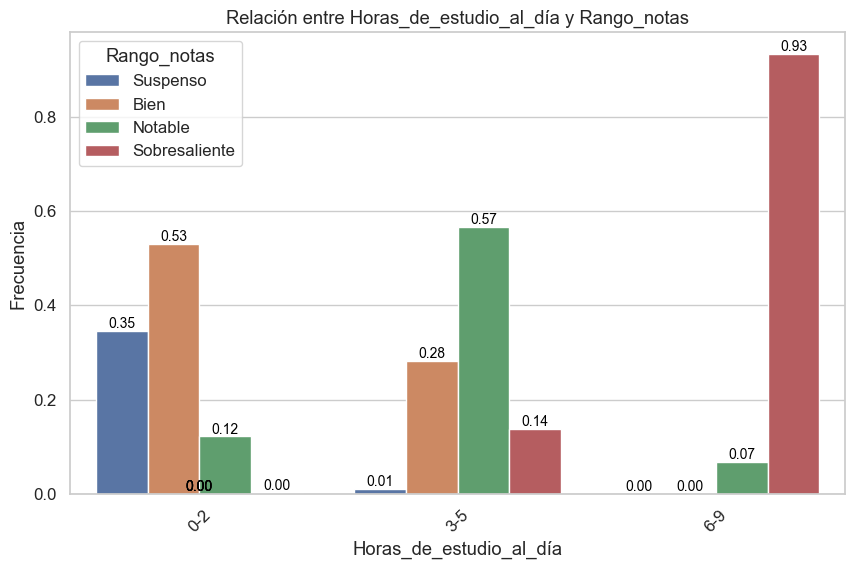

In [ ]:
plot_categorical_relationship_fin(df, "Horas_de_estudio_al_día", "Rango_notas", relative_freq=True, show_values=True, size_group=5)
#plot_categorical_relationship_fin(df, "Horas_de_estudio_al_día", "Rango_notas", relative_freq=False, show_values=True , size_group=5)

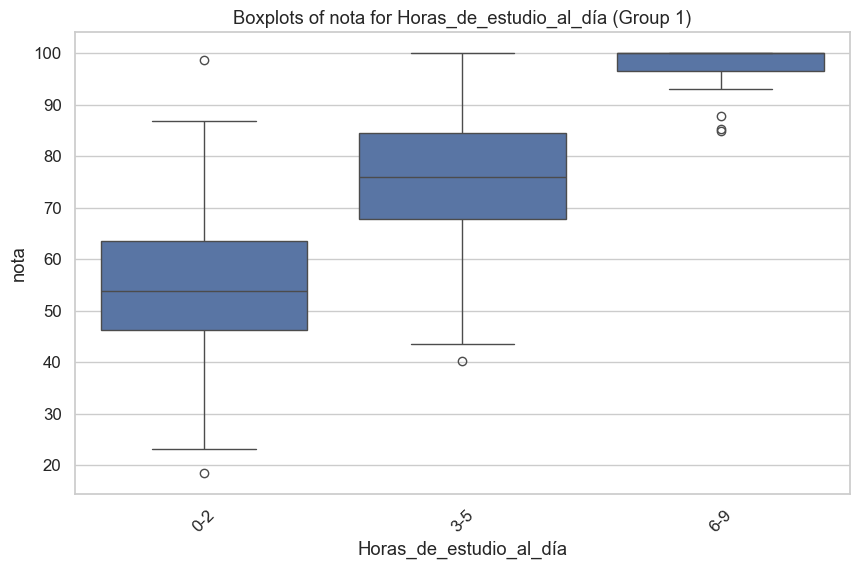

In [ ]:
plot_grouped_boxplots(df, cat_col="Horas_de_estudio_al_día", num_col="nota")

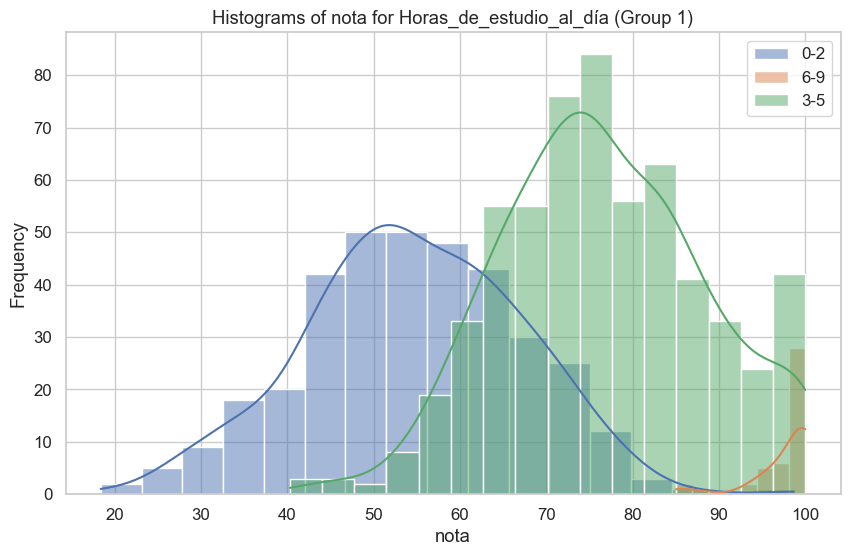

In [ ]:
plot_grouped_histograms(df, cat_col="Horas_de_estudio_al_día", num_col="nota", group_size=3)
# Aquí podemos ver como la gente tiende dedicar 3-5 horas a estudiar, 
# mientras que son menos los que le dedican más de 6

In [ ]:
# Por último realizaremos el test de chi-cuadrado, para dar más luz:
#1 Obtenemos la tabla de contingencia

tabla_contingencia = pd.crosstab(df['Horas_de_estudio_al_día'], df['exam_score'])

#2 Aplicamos la prueba utilizando las herramientas de scipy.stats

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)

print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 1233.9120912784408
P-Value: 3.3543443703745772e-09
Grados de Libertad: 958
Tabla de Frecuencias Esperadas:
 [[ 0.359  0.359  0.359 ...  0.359  0.359 17.232]
 [ 0.597  0.597  0.597 ...  0.597  0.597 28.656]
 [ 0.044  0.044  0.044 ...  0.044  0.044  2.112]]


*El p-value es claramente bajísimo y nos dice que podemos rechazar la hipótesis nula de independencia con un alto grado de confianza, y reafirmar que hay una relación entre las variables, es decir que cuanto más estudias a mejor nota puedes aspirar.*

In [ ]:
rangos = [1, 3, 5, 8, 10]
etiquetas = ["bajo", "medio-bajo", "medio-alto", "alto"]
df['Rango_salud_mental'] = pd.cut(df['mental_health_rating'], bins=rangos, labels=etiquetas, include_lowest=True)

/Users/lilchoco/DS/EDA-AYMC/memoria/bootcampviztools.py:47: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


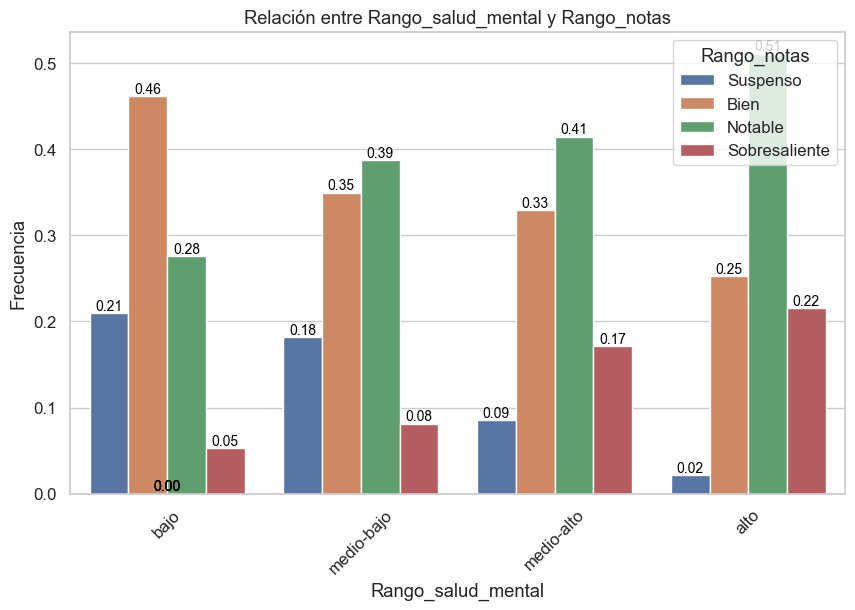

In [ ]:
plot_categorical_relationship_fin(df, "Rango_salud_mental", "Rango_notas", relative_freq=True, show_values=True, size_group=5)
#plot_categorical_relationship_fin(df, "Rango_salud_mental", "Rango_notas", relative_freq=False, show_values=True , size_group=5)

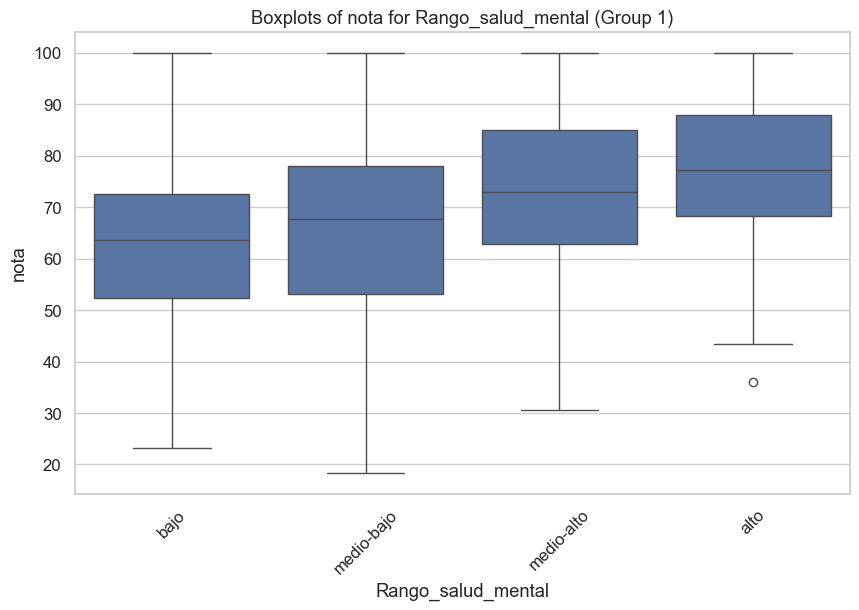

In [ ]:
plot_grouped_boxplots(df, cat_col="Rango_salud_mental", num_col="nota")

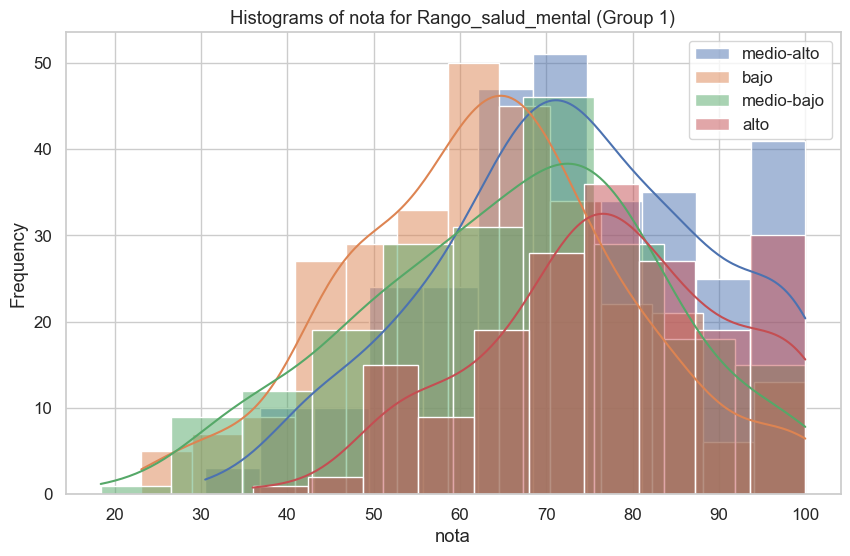

In [ ]:
plot_grouped_histograms(df, cat_col="Rango_salud_mental", num_col="nota", group_size=4)
# En esta gráfica se ve como todos los grupos tienden a la misma nota.

In [ ]:
# Por último realizaremos el test de chi-cuadrado, para dar más luz:
#1 Obtenemos la tabla de contingencia

tabla_contingencia = pd.crosstab(df['Rango_salud_mental'], df['nota'])

#2 Aplicamos la prueba utilizando las herramientas de scipy.stats

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)

print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 1458.7547843186587
P-Value: 0.33863554071990176
Grados de Libertad: 1437
Tabla de Frecuencias Esperadas:
 [[ 0.301  0.301  0.301 ...  0.301  0.301 14.448]
 [ 0.209  0.209  0.209 ...  0.209  0.209 10.032]
 [ 0.304  0.304  0.304 ...  0.304  0.304 14.592]
 [ 0.186  0.186  0.186 ...  0.186  0.186  8.928]]


*A diferencia del anterior, aquí el p-value supera mi alpha(5%), así que tengo que no puedo no rechzar la Hipotesis nula, viendo que la relación entre la salud mental y la nota que sacas no es tan clara.*

In [ ]:
rangos = [0, 4, 8, 10]
etiquetas = ["0-3", "4-7", "8-10"]
df['Rango_ocio_al_dia'] = pd.cut(df['ocio_al_dia'], bins=rangos, labels=etiquetas, include_lowest=True)

/Users/lilchoco/DS/EDA-AYMC/memoria/bootcampviztools.py:47: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


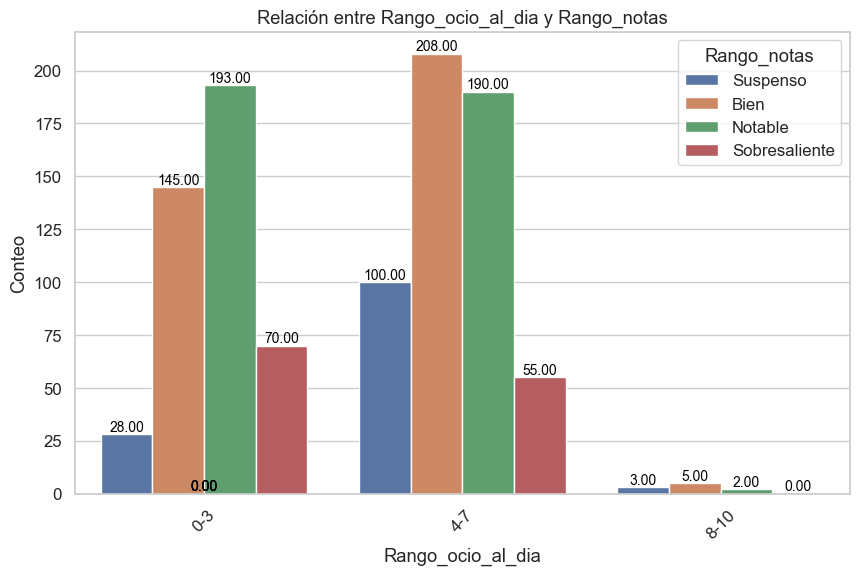

In [ ]:
plot_categorical_relationship_fin(df, "Rango_ocio_al_dia", "Rango_notas", relative_freq=False, show_values=True, size_group=5)

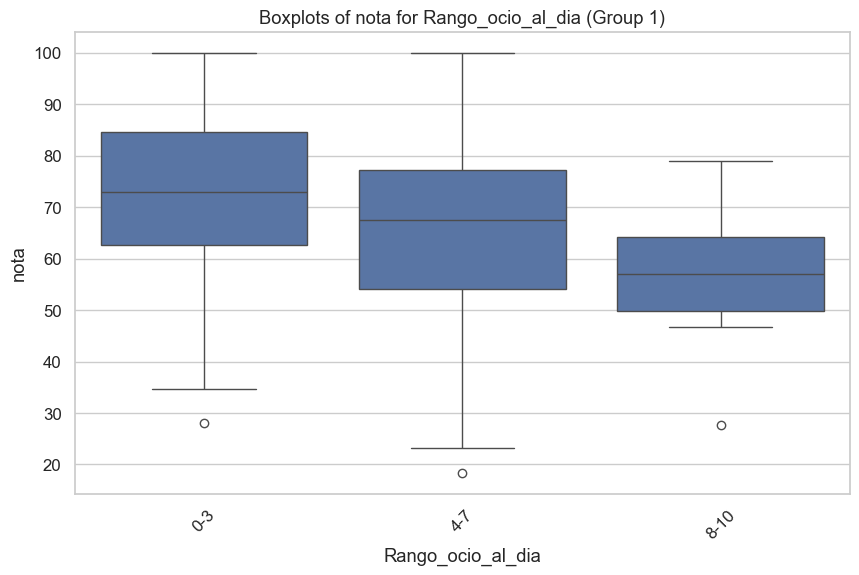

In [ ]:
plot_grouped_boxplots(df, cat_col="Rango_ocio_al_dia", num_col="nota")

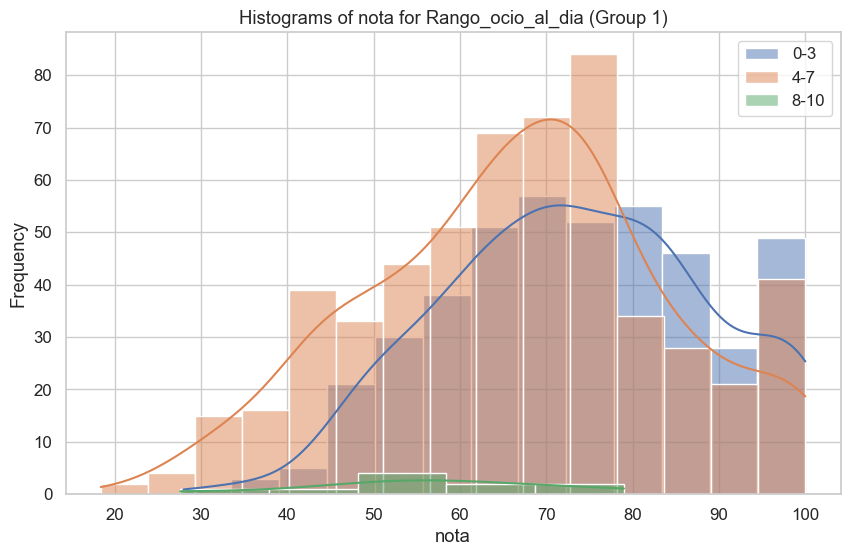

In [ ]:
plot_grouped_histograms(df, cat_col="Rango_ocio_al_dia", num_col="nota", group_size=4)

In [ ]:
# Por último realizaremos el test de chi-cuadrado, para dar más luz:
#1 Obtenemos la tabla de contingencia

tabla_contingencia = pd.crosstab(df['Rango_ocio_al_dia'], df['nota'])

#2 Aplicamos la prueba utilizando las herramientas de scipy.stats

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)

print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 961.2400034646597
P-Value: 0.4644760447105583
Grados de Libertad: 958
Tabla de Frecuencias Esperadas:
 [[4.36436436e-01 4.36436436e-01 4.36436436e-01 ... 4.36436436e-01
  4.36436436e-01 2.09489489e+01]
 [5.53553554e-01 5.53553554e-01 5.53553554e-01 ... 5.53553554e-01
  5.53553554e-01 2.65705706e+01]
 [1.00100100e-02 1.00100100e-02 1.00100100e-02 ... 1.00100100e-02
  1.00100100e-02 4.80480480e-01]]


*Supera mi alpha*

# RECOMENDACIONES OCIO EN EL MÓVIL

# PARA APROBAR

In [ ]:
df["Aprobar"] = df.nota >= 50

In [ ]:
horas = df.groupby(["Aprobar"])["study_hours_per_day"].mean().astype(int).values
horas
print(f"Si quieres aprobar deberías estudiar más de {horas[1]} horas diarias.")
# Si quieres aprobar lo suyo sería estudiar más de 3 horas al día

Si quieres aprobar deberías estudiar más de 3 horas diarias.


In [ ]:
notas = df.groupby(["Rango_notas"])["study_hours_per_day"].mean().astype(int).index
horas = df.groupby(["Rango_notas"])["study_hours_per_day"].mean().astype(int).values

for i in range(len(notas)):
    if notas[i] == "Suspenso":
        if horas[i] == 1:
            print(f"Para evitar suspender estudia más de {horas[i]} hora")
        else: 
            print(f"Para evitar suspender estudia más de {horas[i]} horas")
    else:
        print(f"Para llegar al {notas[i]} estudia más de {horas[i]} horas")

Para evitar suspender estudia más de 1 hora
Para llegar al Bien estudia más de 2 horas
Para llegar al Notable estudia más de 4 horas
Para llegar al Sobresaliente estudia más de 5 horas


/var/folders/p5/6rqhcfqd2h5d4nnr61kzgnt00000gn/T/ipykernel_51293/1625292965.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  notas = df.groupby(["Rango_notas"])["study_hours_per_day"].mean().astype(int).index
/var/folders/p5/6rqhcfqd2h5d4nnr61kzgnt00000gn/T/ipykernel_51293/1625292965.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  horas = df.groupby(["Rango_notas"])["study_hours_per_day"].mean().astype(int).values


/Users/lilchoco/DS/EDA-AYMC/memoria/bootcampviztools.py:108: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby(categorical_col)[numerical_col].median()


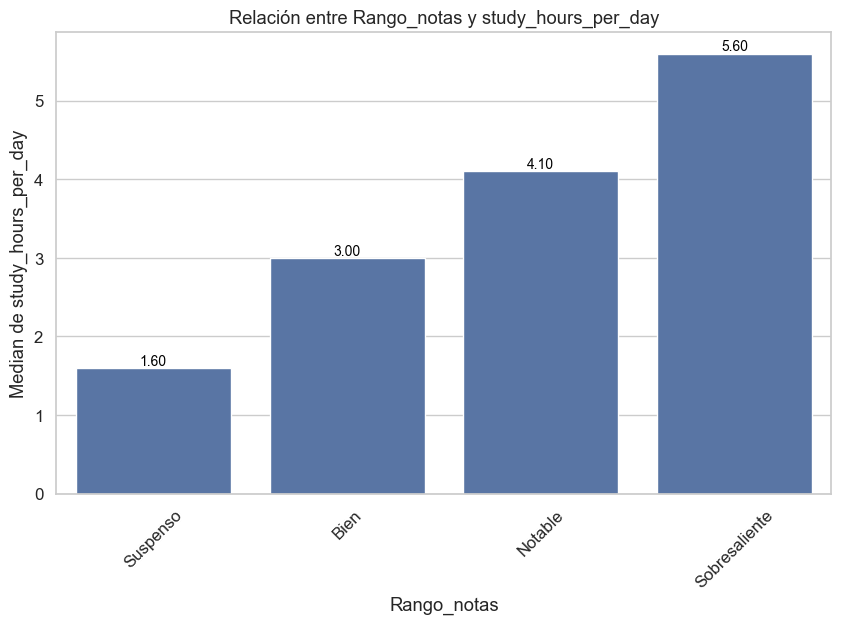

In [ ]:
plot_categorical_numerical_relationship(df, "Rango_notas", "study_hours_per_day", show_values=True, measure='median')


# RECOMENDACIONES OCIO EN EL MÓVIL

# PARA APROBAR

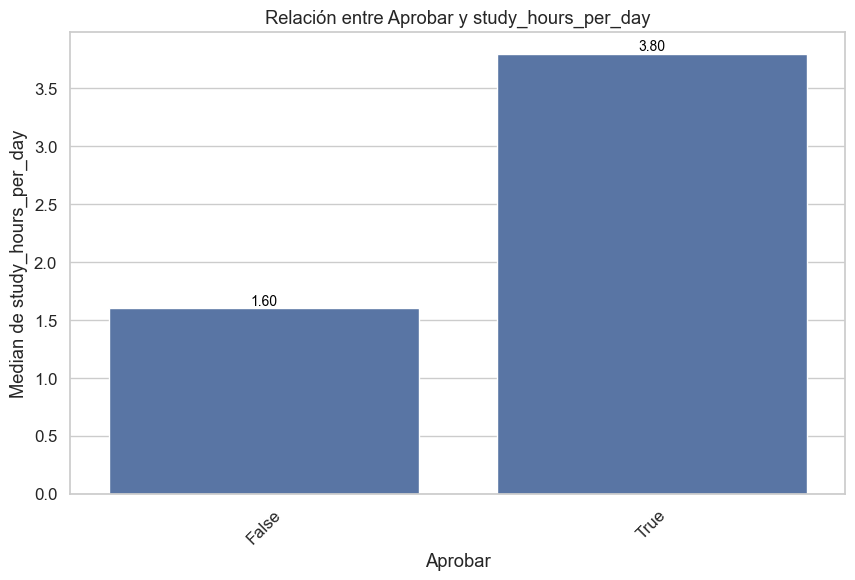

In [ ]:
plot_categorical_numerical_relationship(df, "Aprobar", "study_hours_per_day", show_values=True, measure='median')


In [ ]:
horas = df.groupby(["Aprobar"])["ocio_al_dia"].mean().astype(int).values
horas
if horas[1] == 1:
    print(f"Si quieres aprobar deberías pasar menos de {horas[1]} hora en el móvil diarias.")
else:
    print(f"Si quieres aprobar deberías pasar menos de {horas[1]} horas en el móvil diarias.")
# Si quieres aprobar lo suyo sería estudiar más de 3 horas al día

Si quieres aprobar deberías pasar menos de 4 horas en el móvil diarias.


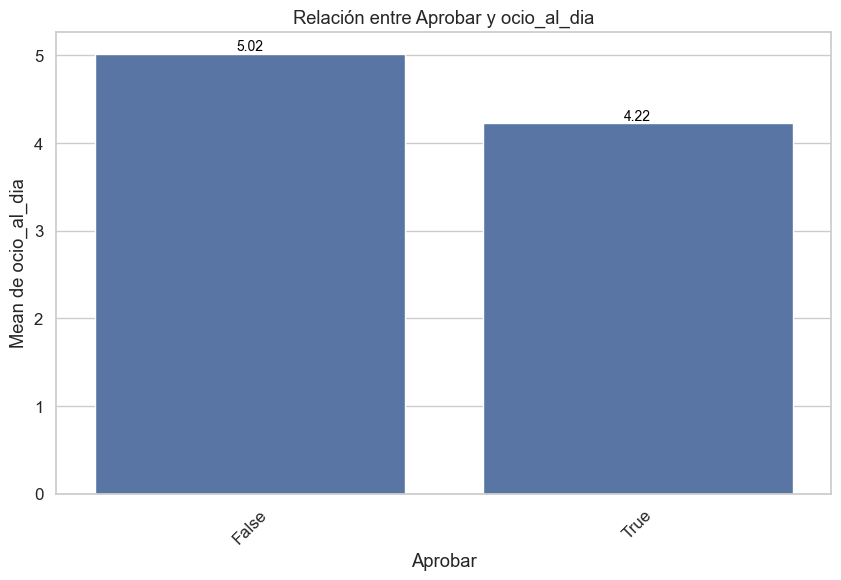

In [ ]:
plot_categorical_numerical_relationship(df, "Aprobar", "ocio_al_dia", show_values=True, measure='mean')

In [ ]:
notas = df.groupby(["Rango_notas"])["ocio_al_dia"].mean().astype(int).index
horas = df.groupby(["Rango_notas"])["ocio_al_dia"].mean().astype(int).values

for i in range(len(notas)):
    if notas[i] == "Suspenso":
        if horas[i] == 1:
            print(f"Para evitar suspender evita usar el móvil más de {horas[i]} hora")
        else: 
            print(f"Para evitar suspender evita usar el móvil más de {horas[i]} horas")
    else:
        print(f"Para llegar al {notas[i]} evita usar el móvil más de {horas[i]} horas")

Para evitar suspender evita usar el móvil más de 5 horas
Para llegar al Bien evita usar el móvil más de 4 horas
Para llegar al Notable evita usar el móvil más de 4 horas
Para llegar al Sobresaliente evita usar el móvil más de 3 horas


/var/folders/p5/6rqhcfqd2h5d4nnr61kzgnt00000gn/T/ipykernel_51293/1149718947.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  notas = df.groupby(["Rango_notas"])["ocio_al_dia"].mean().astype(int).index
/var/folders/p5/6rqhcfqd2h5d4nnr61kzgnt00000gn/T/ipykernel_51293/1149718947.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  horas = df.groupby(["Rango_notas"])["ocio_al_dia"].mean().astype(int).values


/Users/lilchoco/DS/EDA-AYMC/memoria/bootcampviztools.py:111: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby(categorical_col)[numerical_col].mean()


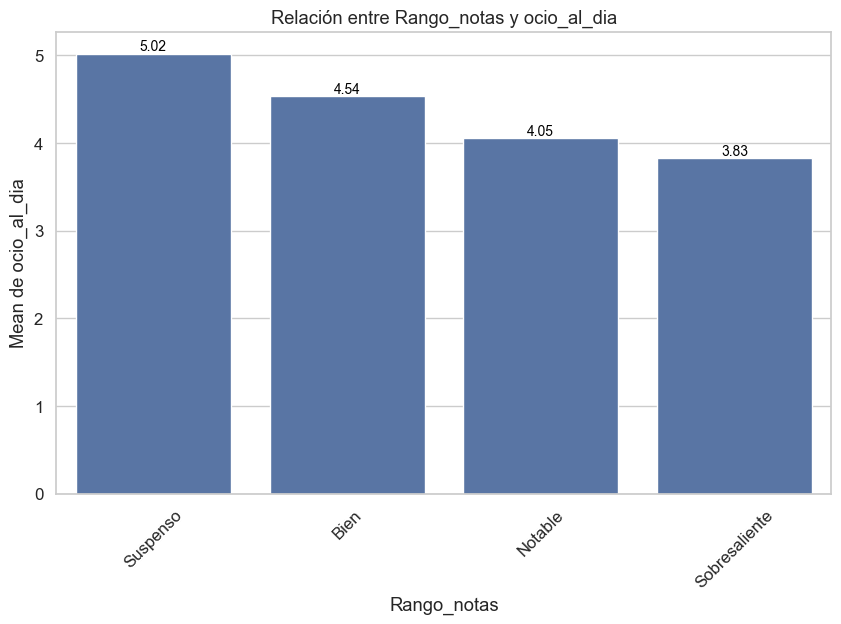

In [ ]:
plot_categorical_numerical_relationship(df, "Rango_notas", "ocio_al_dia", show_values=True, measure='mean')

# SITUACIÓN FAMILIAR

In [172]:
d1=pd.read_csv("../data/personal/student-mat.csv",sep=";")

d2=pd.read_csv("../data/personal/student-por.csv",sep=";")

d3 = pd.concat([d1,d2], ignore_index=True)

In [173]:
# LA DOCUMENTACIÓN DEL DATASET DICE QUE HAY DUPLICADOS, ASÍ QUE FILTRO POR ESAS COLUMNAS Y QUITO DUPLICADOS.

In [174]:
df = d3.drop_duplicates(subset=["school","sex","age","address","famsize","Pstatus","Medu","Fedu","Mjob","Fjob","reason","nursery","internet"])

In [175]:
df.reset_index()

,index,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,GP,F,18,U,GT3,A,4,4,at_home,...,4,3,4,1,1,3,6,5,6,6
1,1,GP,F,17,U,GT3,T,1,1,at_home,...,5,3,3,1,1,3,4,5,5,6
2,2,GP,F,15,U,LE3,T,1,1,at_home,...,4,3,2,2,3,3,10,7,8,10
3,3,GP,F,15,U,GT3,T,4,2,health,...,3,2,2,1,1,5,2,15,14,15
4,4,GP,F,16,U,GT3,T,3,3,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
657,1005,MS,F,19,R,GT3,A,1,1,at_home,...,3,5,4,1,4,1,0,8,0,0
658,1006,MS,F,18,R,GT3,T,2,2,services,...,4,2,1,1,1,4,5,14,14,15
659,1013,MS,F,18,R,LE3,A,1,2,at_home,...,4,3,4,1,4,5,0,16,15,15
660,1027,MS,F,19,R,GT3,T,1,1,at_home,...,4,3,3,1,1,3,4,7,8,9


In [177]:
df.internet.value_counts(normalize=True)*100 # >75% dicen YES, así que puedo dropear

internet
yes    76.132931
no     23.867069
Name: proportion, dtype: float64

In [178]:
# DROP FIJO
df.drop(["G1", "G2", "school", "internet", "higher", "nursery", "activities", "paid", "studytime", "freetime", "goout", "traveltime"], axis=1, inplace=True)
df

/var/folders/p5/6rqhcfqd2h5d4nnr61kzgnt00000gn/T/ipykernel_51293/3709255444.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(["G1", "G2", "school", "internet", "higher", "nursery", "activities", "paid", "studytime", "freetime", "goout", "traveltime"], axis=1, inplace=True)


,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,failures,schoolsup,famsup,romantic,famrel,Dalc,Walc,health,absences,G3
0,F,18,U,GT3,A,4,4,at_home,teacher,course,...,0,yes,no,no,4,1,1,3,6,6
1,F,17,U,GT3,T,1,1,at_home,other,course,...,0,no,yes,no,5,1,1,3,4,6
2,F,15,U,LE3,T,1,1,at_home,other,other,...,3,yes,no,no,4,2,3,3,10,10
3,F,15,U,GT3,T,4,2,health,services,home,...,0,no,yes,yes,3,1,1,5,2,15
4,F,16,U,GT3,T,3,3,other,other,home,...,0,no,yes,no,4,1,2,5,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,F,19,R,GT3,A,1,1,at_home,at_home,course,...,3,no,yes,yes,3,1,4,1,0,0
1006,F,18,R,GT3,T,2,2,services,other,home,...,0,no,no,yes,4,1,1,4,5,15
1013,F,18,R,LE3,A,1,2,at_home,other,course,...,0,no,no,yes,4,1,4,5,0,15
1027,F,19,R,GT3,T,1,1,at_home,other,course,...,1,no,yes,yes,4,1,1,3,4,9


In [ ]:
# DROP SECUNDARIO (POSIBLE FUTURO ANÁLISIS)
df.drop(["reason", "failures", "schoolsup", "Dalc", "health", "absences"], axis=1, inplace=True)
df

/var/folders/p5/6rqhcfqd2h5d4nnr61kzgnt00000gn/T/ipykernel_51293/1614551908.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(["reason", "failures", "schoolsup", "Dalc", "health", "absences"], axis=1, inplace=True)


,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,guardian,famsup,romantic,famrel,Walc,G3
0,F,18,U,GT3,A,4,4,at_home,teacher,mother,no,no,4,1,6
1,F,17,U,GT3,T,1,1,at_home,other,father,yes,no,5,1,6
2,F,15,U,LE3,T,1,1,at_home,other,mother,no,no,4,3,10
3,F,15,U,GT3,T,4,2,health,services,mother,yes,yes,3,1,15
4,F,16,U,GT3,T,3,3,other,other,father,yes,no,4,2,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,F,19,R,GT3,A,1,1,at_home,at_home,other,yes,yes,3,4,0
1006,F,18,R,GT3,T,2,2,services,other,mother,no,yes,4,1,15
1013,F,18,R,LE3,A,1,2,at_home,other,mother,no,yes,4,4,15
1027,F,19,R,GT3,T,1,1,at_home,other,other,yes,yes,4,1,9


In [180]:
df.describe()

,age,Medu,Fedu,famrel,Walc,G3
count,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000
mean,16.812689,2.492447,2.293051,3.938066,2.282477,10.725076
std,1.269194,1.130958,1.094027,0.941930,1.290121,4.106738
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,16.000000,2.000000,1.000000,4.000000,1.000000,9.000000
50%,17.000000,2.000000,2.000000,4.000000,2.000000,11.000000
75%,18.000000,4.000000,3.000000,5.000000,3.000000,13.000000
max,22.000000,4.000000,4.000000,5.000000,5.000000,20.000000


In [181]:
card_tipo(df)

,Card,%_Card,Tipo,tipo_sugerido
sex,2,0.302115,object,Binaria
age,8,1.208459,int64,Numerica discreta
address,2,0.302115,object,Binaria
famsize,2,0.302115,object,Binaria
Pstatus,2,0.302115,object,Binaria
Medu,5,0.755287,int64,Categorica
Fedu,5,0.755287,int64,Categorica
Mjob,5,0.755287,object,Categorica
Fjob,5,0.755287,object,Categorica
guardian,3,0.453172,object,Categorica


# RANGOS CATEGÓRICOS

In [182]:
rangos = [0, 9, 14, 17, 20]
etiquetas = ["Suspenso", "Bien", "Notable", "Sobresaliente"]
df['Rango_notas'] = pd.cut(df['G3'], bins=rangos, labels=etiquetas, include_lowest=True)

/var/folders/p5/6rqhcfqd2h5d4nnr61kzgnt00000gn/T/ipykernel_51293/2625184685.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Rango_notas'] = pd.cut(df['G3'], bins=rangos, labels=etiquetas, include_lowest=True)


In [183]:
rangos = [0, 1, 2, 3, 4]
etiquetas = ["Bajo", "Medio-Bajo", "Medio-Alto", "Alto"]
df['Rango_edu_mother'] = pd.cut(df['Medu'], bins=rangos, labels=etiquetas, include_lowest=True)

/var/folders/p5/6rqhcfqd2h5d4nnr61kzgnt00000gn/T/ipykernel_51293/4168101757.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Rango_edu_mother'] = pd.cut(df['Medu'], bins=rangos, labels=etiquetas, include_lowest=True)


In [184]:
rangos = [0, 1, 2, 3, 4]
etiquetas = ["Bajo", "Medio-Bajo", "Medio-Alto", "Alto"]
df['Rango_edu_father'] = pd.cut(df['Fedu'], bins=rangos, labels=etiquetas, include_lowest=True)

/var/folders/p5/6rqhcfqd2h5d4nnr61kzgnt00000gn/T/ipykernel_51293/536974665.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Rango_edu_father'] = pd.cut(df['Fedu'], bins=rangos, labels=etiquetas, include_lowest=True)


In [185]:
rangos = [1, 3, 4, 5]
etiquetas = ["Baja", "Media", "Alta"]
df['Rango_fam_rel'] = pd.cut(df['famrel'], bins=rangos, labels=etiquetas, include_lowest=True)

/var/folders/p5/6rqhcfqd2h5d4nnr61kzgnt00000gn/T/ipykernel_51293/923921995.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Rango_fam_rel'] = pd.cut(df['famrel'], bins=rangos, labels=etiquetas, include_lowest=True)


In [186]:
rangos = [1, 3, 4, 5]
etiquetas = ["Baja", "Media", "Alta"]
df['Rango_fam_rel'] = pd.cut(df['famrel'], bins=rangos, labels=etiquetas, include_lowest=True)

/var/folders/p5/6rqhcfqd2h5d4nnr61kzgnt00000gn/T/ipykernel_51293/923921995.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Rango_fam_rel'] = pd.cut(df['famrel'], bins=rangos, labels=etiquetas, include_lowest=True)


In [187]:
df["Aprobar"] = df.G3 >= 10

/var/folders/p5/6rqhcfqd2h5d4nnr61kzgnt00000gn/T/ipykernel_51293/4060591623.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Aprobar"] = df.G3 >= 10


/Users/lilchoco/DS/EDA-AYMC/memoria/bootcampviztools.py:47: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


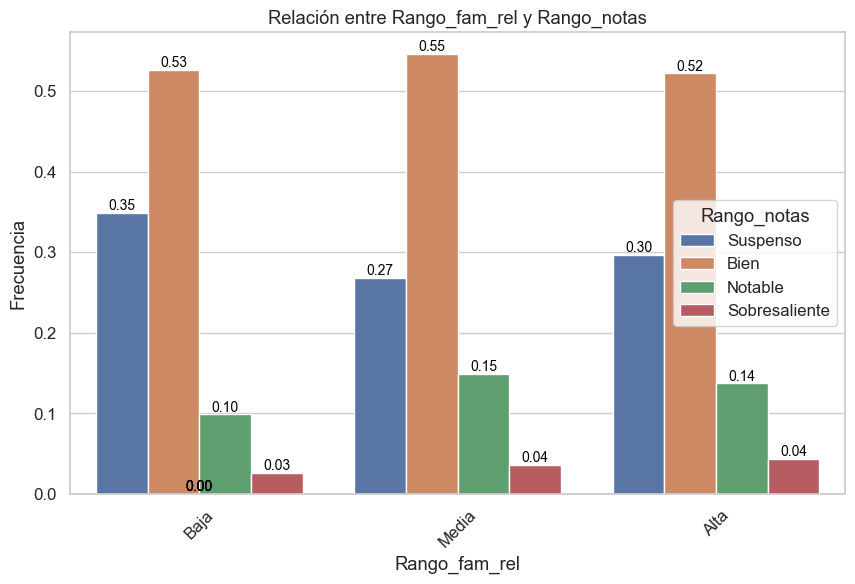

In [192]:
plot_categorical_relationship_fin(df, "Rango_fam_rel", "Rango_notas", relative_freq=True, size_group= 5, show_values=True)

/var/folders/p5/6rqhcfqd2h5d4nnr61kzgnt00000gn/T/ipykernel_51293/3786413607.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["famsup","Rango_notas"])[["Rango_notas"]].count()
/Users/lilchoco/DS/EDA-AYMC/memoria/bootcampviztools.py:47: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


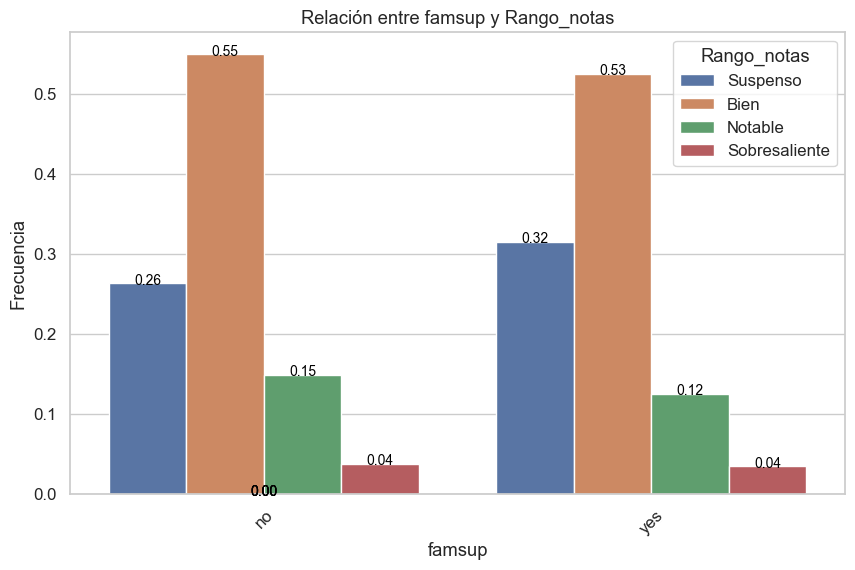

In [ ]:
plot_categorical_relationship_fin(df, "famsup", "Rango_notas", relative_freq=True, size_group= 2, show_values=True)

/Users/lilchoco/DS/EDA-AYMC/memoria/bootcampviztools.py:47: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


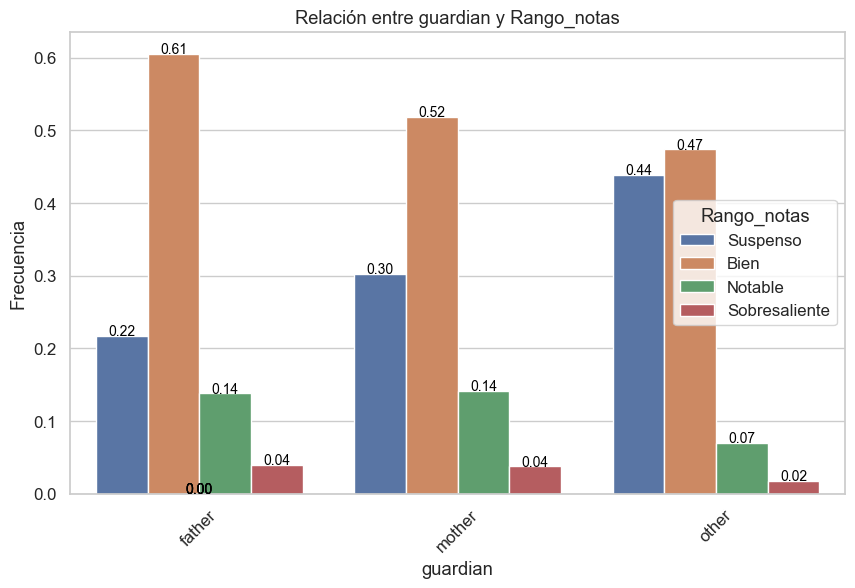

In [ ]:
plot_categorical_relationship_fin(df, "guardian", "Rango_notas", relative_freq=True, size_group= 3, show_values=True)

/Users/lilchoco/DS/EDA-AYMC/memoria/bootcampviztools.py:47: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


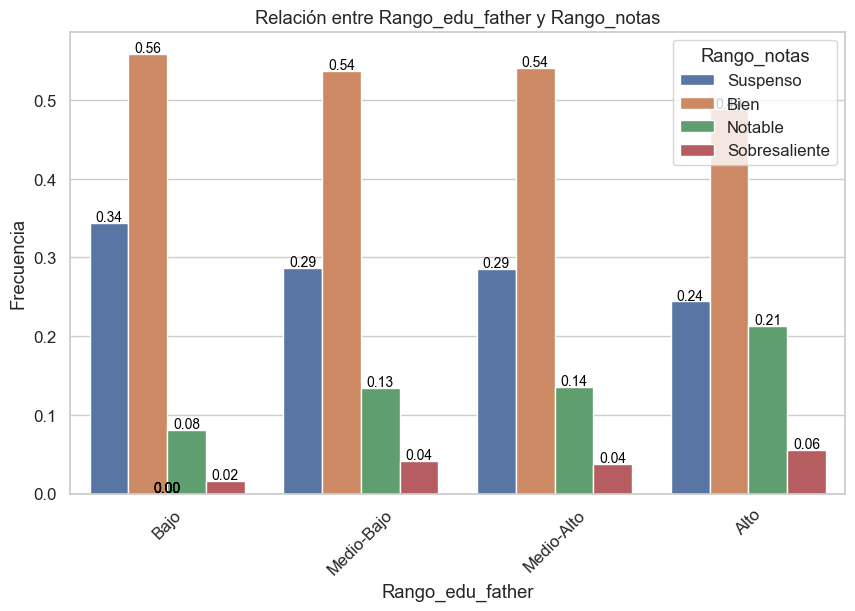

In [193]:
plot_categorical_relationship_fin(df, "Rango_edu_father", "Rango_notas", relative_freq=True,  show_values=True, size_group=4)

/Users/lilchoco/DS/EDA-AYMC/memoria/bootcampviztools.py:47: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


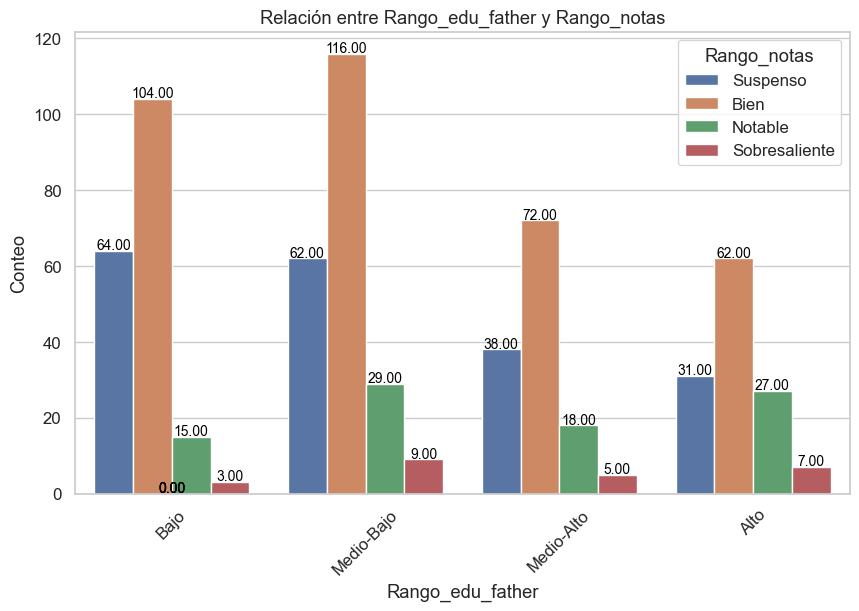

In [194]:
plot_categorical_relationship_fin(df, "Rango_edu_father", "Rango_notas", relative_freq=False,  show_values=True, size_group=4)

/Users/lilchoco/DS/EDA-AYMC/memoria/bootcampviztools.py:47: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


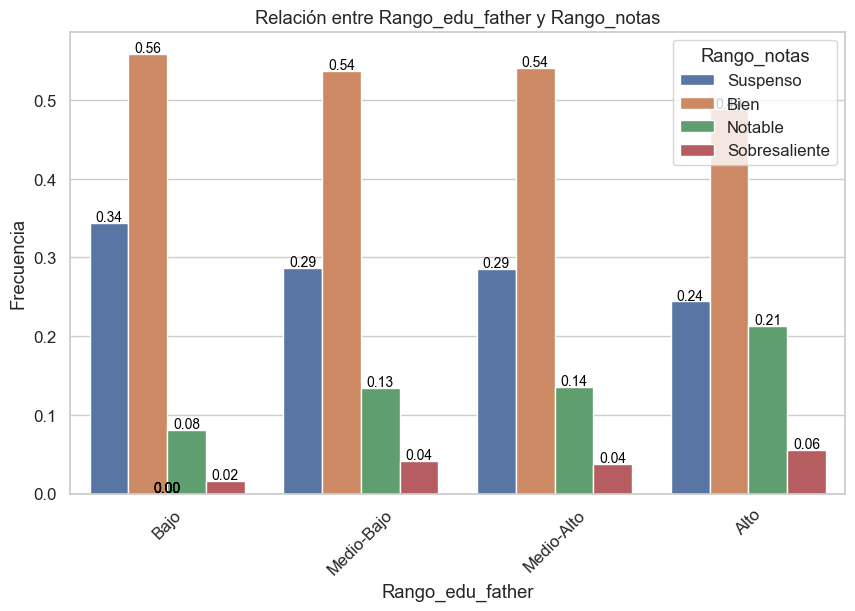

In [ ]:
plot_categorical_relationship_fin(df, "Rango_edu_mother", "Rango_notas", relative_freq=True,  show_values=True, size_group=4)
# Cuanto mayor la educación de la madre, mayor nota puede aspirar

/Users/lilchoco/DS/EDA-AYMC/memoria/bootcampviztools.py:47: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


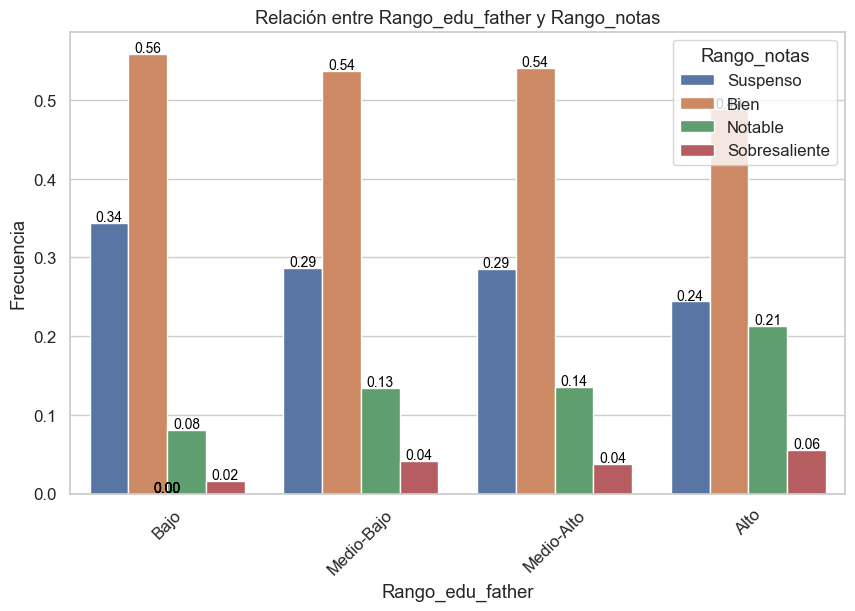

In [200]:
plot_categorical_relationship_fin(df, "Rango_edu_father", "Rango_notas", relative_freq=True,  show_values=True, size_group=4)
# Cuanto mayor la educación del padre, mayor nota puede aspirar

/Users/lilchoco/DS/EDA-AYMC/memoria/bootcampviztools.py:47: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


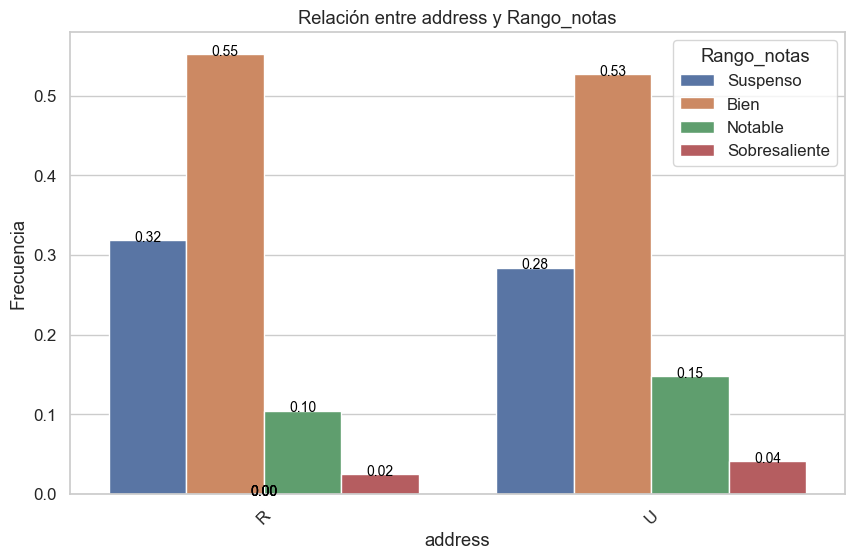

In [201]:
plot_categorical_relationship_fin(df, "address", "Rango_notas", relative_freq=True, size_group= 2, show_values=True)

/Users/lilchoco/DS/EDA-AYMC/memoria/bootcampviztools.py:47: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


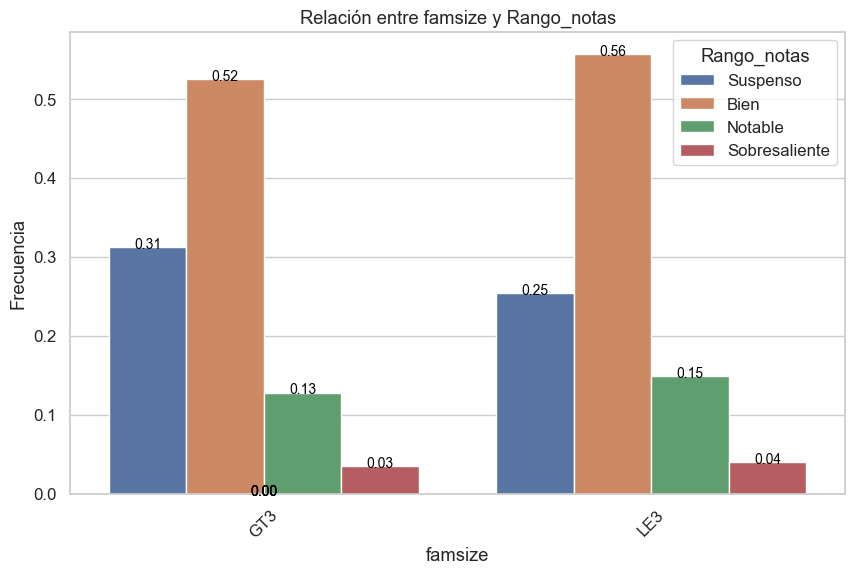

In [202]:
plot_categorical_relationship_fin(df, "famsize", "Rango_notas", relative_freq=True, size_group= 2, show_values=True)

/Users/lilchoco/DS/EDA-AYMC/memoria/bootcampviztools.py:47: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


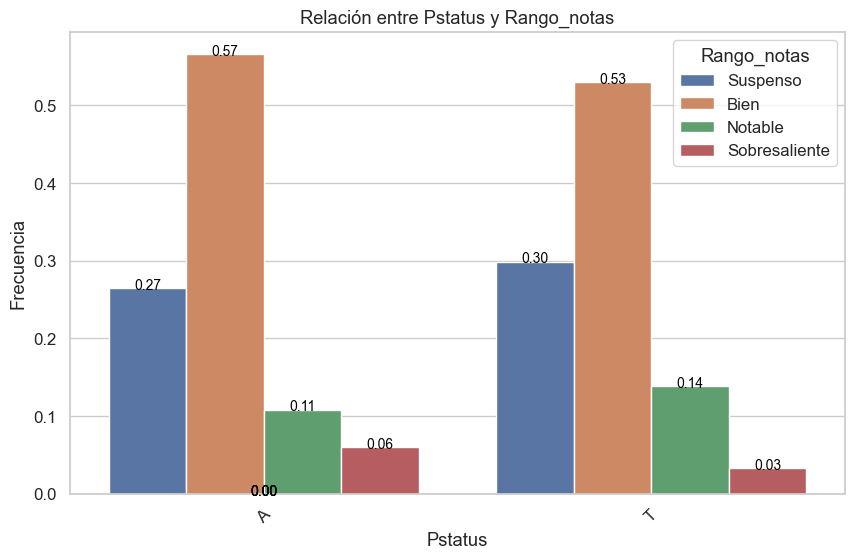

In [203]:
plot_categorical_relationship_fin(df, "Pstatus", "Rango_notas", relative_freq=True, size_group= 2, show_values=True)

/Users/lilchoco/DS/EDA-AYMC/memoria/bootcampviztools.py:47: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


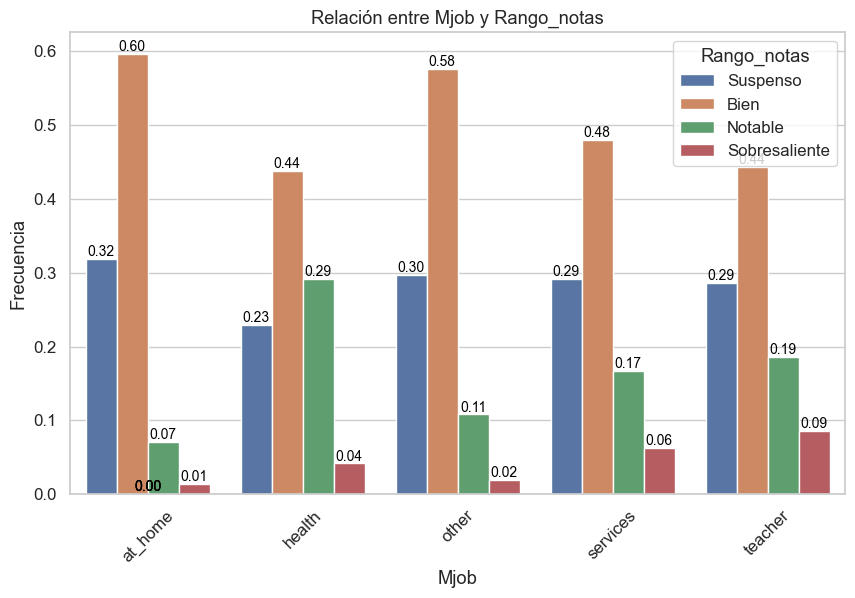

In [206]:
plot_categorical_relationship_fin(df, "Mjob", "Rango_notas", relative_freq=True, size_group= 5, show_values=True)
# Esto que me puede decir ¿?
# La madres que se dedican al sector de la salud, sus hijos suspenden menos.

/Users/lilchoco/DS/EDA-AYMC/memoria/bootcampviztools.py:47: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


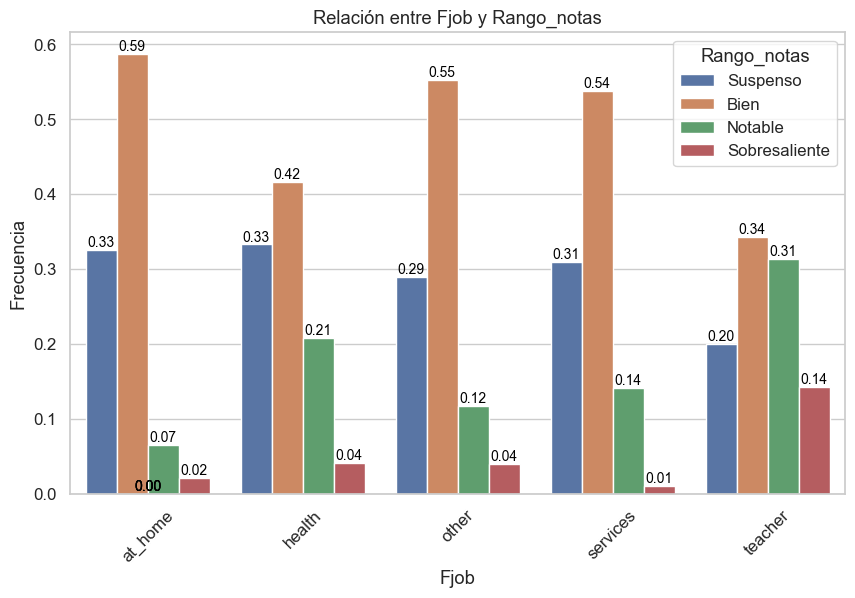

In [205]:
plot_categorical_relationship_fin(df, "Fjob", "Rango_notas", relative_freq=True, size_group= 5, show_values=True)
# Mientras que los padres que se dedican a la enseñanza, no hay tantos suspensos y son los que generan más sobresalientes con difernecia
# Por lo que este trabajo podría decirme algo

/Users/lilchoco/DS/EDA-AYMC/memoria/bootcampviztools.py:47: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


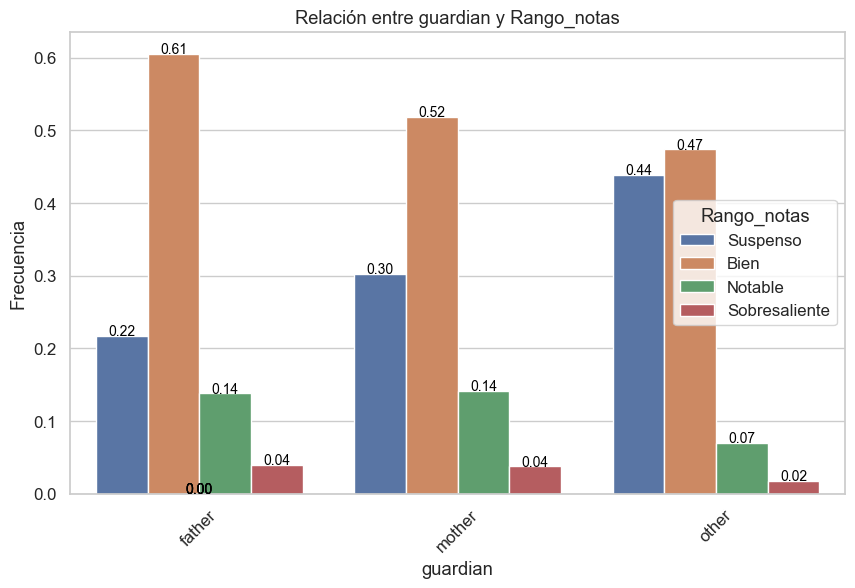

In [207]:
plot_categorical_relationship_fin(df, "guardian", "Rango_notas", relative_freq=True, size_group= 3, show_values=True)

# PERFIL PERSONA QUE APRUEBA

In [ ]:
mask = df.Aprobar
df[mask][["address", "famsize", "Pstatus", "Rango_edu_mother", "Rango_edu_father", "Rango_fam_rel", "Mjob", "Mjob", "guardian", "famsup"]].mode()

,address,famsize,Pstatus,Rango_edu_mother,Rango_edu_father,Rango_fam_rel,Mjob,Mjob,guardian,famsup
0,U,GT3,T,Medio-Bajo,Medio-Bajo,Media,other,other,mother,yes


# PERFIL PERSONA QUE SUSPENDE 

In [ ]:
mask = df.Aprobar == False
df[mask][["address", "famsize", "Pstatus", "Rango_edu_mother", "Rango_edu_father", "Rango_fam_rel", "Mjob", "Mjob", "guardian", "famsup"]].mode()

,address,famsize,Pstatus,Rango_edu_mother,Rango_edu_father,Rango_fam_rel,Mjob,Mjob,guardian,famsup
0,U,GT3,T,Medio-Bajo,Bajo,Media,other,other,mother,yes


# PERFIL PARA UN BIEN

In [ ]:
mask = df.Rango_notas == "Bien"
df[mask][["address", "famsize", "Pstatus", "Rango_edu_mother", "Rango_edu_father", "Rango_fam_rel", "Mjob", "Mjob", "guardian", "famsup"]].mode()

,address,famsize,Pstatus,Rango_edu_mother,Rango_edu_father,Rango_fam_rel,Mjob,Mjob,guardian,famsup
0,U,GT3,T,Medio-Bajo,Medio-Bajo,Media,other,other,mother,yes


# PERFIL PARA UN NOTABLE

In [ ]:
mask = df.Rango_notas == "Notable"
df[mask][["address", "famsize", "Pstatus", "Rango_edu_mother", "Rango_edu_father", "Rango_fam_rel", "Mjob", "Mjob", "guardian", "famsup"]].mode()

,address,famsize,Pstatus,Rango_edu_mother,Rango_edu_father,Rango_fam_rel,Mjob,Mjob,guardian,famsup
0,U,GT3,T,Alto,Medio-Bajo,Media,other,other,mother,yes


# PERFIL PERSONA UN SOBRESALIENTE

In [ ]:
mask = df.Rango_notas == "Sobresaliente"
df[mask][["address", "famsize", "Pstatus", "Rango_edu_mother", "Rango_edu_father", "Rango_fam_rel", "Mjob", "Mjob", "guardian", "famsup"]].mode()

,address,famsize,Pstatus,Rango_edu_mother,Rango_edu_father,Rango_fam_rel,Mjob,Mjob,guardian,famsup
0,U,GT3,T,Alto,Medio-Bajo,Media,services,services,mother,yes


## LAS CONCLUSIÓN ES QUE, LA MUESTRA ES MUY PEQUEÑA PARA DAR ALGO DE LUZ EN ESTE TEMA, YA QUE EN LA PARTE DE SITUACIÓN FAMILIAR, NO ESTÁN LOS DATOS MUY COMPENSADOS Y DENTRO DE CADA CATEGORÍA HAY UNA DISTRIBUCIÓN BASTANTE PARECIDA, LO QUE ME LLEVA A PENSAR QUE NO AFECTA DIRECTAMENTE, ES DECIR, SI LOS PADRES ESTÁN JUNTOS O SEPARADOS, EL ESTUDIANTE PUEDE SEGUIR SUSPENDIENDO Y PUEDE SEGUIR SACANDO SOBRESALIENTE Y ASÍ CON LA GRAN MAYORÍA DE PARAMETROS.